<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/ML_KNN%26Ensemble_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_learning_curves

# Load dataset
- Breast Cancer data

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
df = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.replace(to_replace={'target': {0: cancer.target_names[0]}}, inplace=True)
df.replace(to_replace={'target': {1: cancer.target_names[1]}}, inplace=True)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


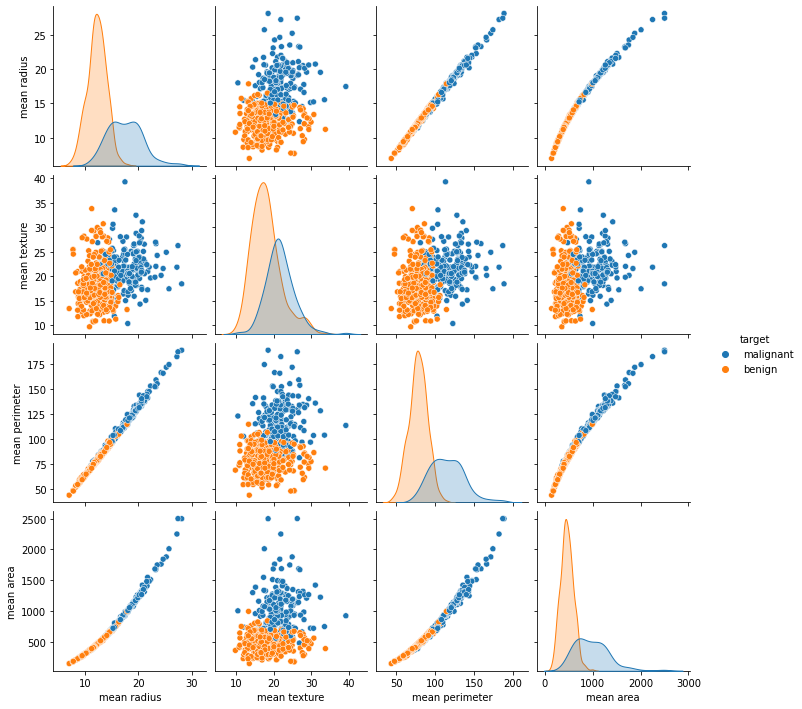

In [30]:
sns.pairplot(vars=["mean radius", "mean texture", "mean perimeter", "mean area"], hue="target", data=df)
plt.show()

In [8]:
cancer['feature_names'].size

30

In [9]:
print(cancer['target_names'])
print(df['target'].unique())

['malignant' 'benign']
['malignant' 'benign']


malignant(0)와 benign(1)의 의미?
- https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240

# Data Preprocessing

In [32]:
# 시각화를 위해 X 데이터 중 mean texture와 mean area 2개 feature만 선택
X = cancer['data'][:,[1, 3]]
y = cancer['target']

In [33]:
# StandardScaler() Scaler 객체 생성
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state=0)

# KNN 

In [35]:
# knn 디폴트 파라미터
knn = KNeighborsClassifier(n_neighbors=5, p = 2, metric='minkowski')

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
y_pred = knn.predict(X_test)

print('총 테스트 개수: {}, 오류개수: {}'.format(len(y_test),(y_test != y_pred).sum()))
print('정확도: {}'.format(accuracy_score(y_test,y_pred)))

총 테스트 개수: 114, 오류개수: 19
정확도: 0.8333333333333334


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


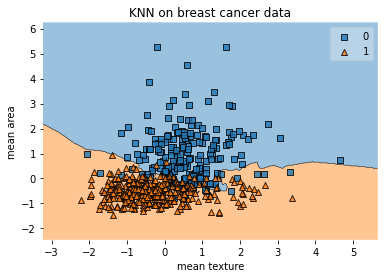

In [41]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, clf = knn)
plt.title('KNN on breast cancer data')
plt.xlabel("mean texture")
plt.ylabel("mean area")
plt.show()

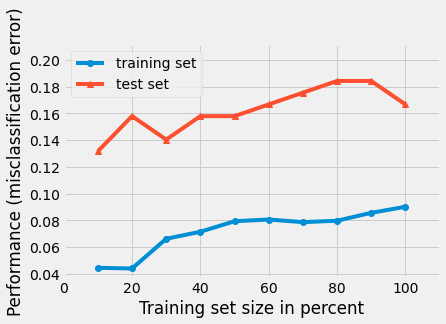

In [43]:
plot_learning_curves(X_train, y_train, X_test, y_test, knn, print_model=False)
plt.show()

# Ensemble(Bagging)

In [48]:
# bagging 모델 생성
bagging = BaggingClassifier(knn, n_estimators=10, max_samples= 0.5, max_features= 0.5)

In [51]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [52]:
y_pred = bagging.predict(X_test)

print('총 테스트 개수: {}, 오류개수: {}'.format(len(y_test),(y_test != y_pred).sum()))
print('정확도: {}'.format(accuracy_score(y_test,y_pred)))

총 테스트 개수: 114, 오류개수: 12
정확도: 0.8947368421052632


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


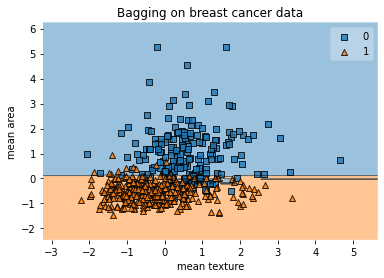

In [55]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, clf = bagging)
plt.title('Bagging on breast cancer data')
plt.xlabel("mean texture")
plt.ylabel("mean area")
plt.show()

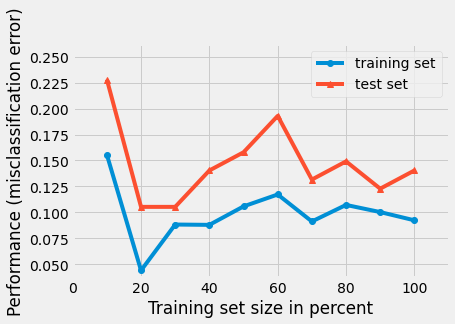

In [56]:
plot_learning_curves(X_train, y_train, X_test, y_test, bagging, print_model=False)
plt.show()